<a href="https://colab.research.google.com/github/vedmara/project/blob/main/Project_phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Background

Indication: Low Back Pain ( LBP)

Parallel, double blind,Multicentric Phase III Clinical Trial ( 4 centers)

Number of treatments: 03

Treatments: Test, Reference and Placebo

Sample Size: n=780

Visits: Day 1( V1), Day 3( V2) and Day 7(V3)

Primary End Point: Visual Analogue Scale (VAS)

Scale: 0-100 mm

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
aedata=pd.read_csv("/content/drive/MyDrive/Project/AE DATA.csv")
aedata.head()
#aedata.info()

,Patient_ID,AE,AE_REL,AE_SEVERITY
0,PID/001,NONE,NaN,NaN
1,PID/002,NONE,NaN,NaN
2,PID/003,NONE,NaN,NaN
3,PID/004,NONE,NaN,NaN
4,PID/005,NONE,NaN,NaN


In [3]:
baselinedata=pd.read_csv('/content/drive/MyDrive/Project/Baseline Characteristics.csv')
baselinedata.head()
#baselinedata.info()

,Patient_ID,Work,Surgery_1Y
0,PID/001,FT,NO
1,PID/002,FT,NO
2,PID/003,FT,NO
3,PID/004,FT,NO
4,PID/005,FT,NO


In [4]:
demografdata=pd.read_csv('/content/drive/MyDrive/Project/Demographics.csv')
demografdata.head()
#demografdata.info()

,Patient_ID,Age,Gender
0,PID/001,24,Female
1,PID/002,25,Male
2,PID/003,22,Female
3,PID/004,54,Female
4,PID/005,57,Male


In [5]:
globaldata=pd.read_csv('/content/drive/MyDrive/Project/Global Assessment.csv')
globaldata.head()
#globaldata.info()

,Patient_ID,PGA
0,PID/001,2
1,PID/002,4
2,PID/003,4
3,PID/004,4
4,PID/005,1


In [6]:
randomazedata=pd.read_csv('/content/drive/MyDrive/Project/Randomization.csv')
randomazedata.head()
#randomazedata.info()

,Patient_ID,Treatment,Center
0,PID/001,PLACEBO,C1
1,PID/002,TEST,C3
2,PID/003,TEST,C2
3,PID/004,TEST,C1
4,PID/005,PLACEBO,C1


In [7]:
studydata=pd.read_csv('/content/drive/MyDrive/Project/Study Populations.csv')
studydata.head()
#studydata.info()

,Patient_ID,ITT,PP
0,PID/001,YES,YES
1,PID/002,YES,YES
2,PID/003,YES,YES
3,PID/004,YES,YES
4,PID/005,YES,YES


In [8]:
vasdata=pd.read_csv('/content/drive/MyDrive/Project/VAS Data.csv')
vasdata.head()
#vasdata.info()

,Patient_ID,Day,VAS
0,PID/001,DAY1,72
1,PID/002,DAY1,70
2,PID/003,DAY1,66
3,PID/004,DAY1,23
4,PID/005,DAY1,65


In [9]:
vitaldata=pd.read_csv('/content/drive/MyDrive/Project/Vital Signs.csv')
vitaldata.head()
#vitaldata.info()

,Patient_ID,PR,Pulse rate (beats/min),RR,Respiratory rate (breaths/min),SBP,Systolic blood pressure (mmHg),DBP,Diastolic blood pressure (mmHg)
0,PID/001,77,BEATS/MIN,16,BREATHS/MIN,110,MMHG,80,MMHG
1,PID/002,74,BEATS/MIN,17,BREATHS/MIN,122,MMHG,70,MMHG
2,PID/003,86,BEATS/MIN,14,BREATHS/MIN,120,MMHG,80,MMHG
3,PID/004,84,BEATS/MIN,16,BREATHS/MIN,124,MMHG,82,MMHG
4,PID/005,84,BEATS/MIN,15,BREATHS/MIN,110,MMHG,80,MMHG


In [10]:
# Merge datasets
merged_data = pd.merge(randomazedata, studydata, on='Patient_ID', how='inner')
merged_data = pd.merge(merged_data, demografdata, on='Patient_ID', how='inner')
merged_data = pd.merge(merged_data, baselinedata, on='Patient_ID', how='inner')
merged_data = pd.merge(merged_data, vitaldata, on='Patient_ID', how='inner')
#merged_data.info()
merged_data.head()

,Patient_ID,Treatment,Center,ITT,PP,Age,Gender,Work,Surgery_1Y,PR,Pulse rate (beats/min),RR,Respiratory rate (breaths/min),SBP,Systolic blood pressure (mmHg),DBP,Diastolic blood pressure (mmHg)
0,PID/001,PLACEBO,C1,YES,YES,24,Female,FT,NO,77,BEATS/MIN,16,BREATHS/MIN,110,MMHG,80,MMHG
1,PID/002,TEST,C3,YES,YES,25,Male,FT,NO,74,BEATS/MIN,17,BREATHS/MIN,122,MMHG,70,MMHG
2,PID/003,TEST,C2,YES,YES,22,Female,FT,NO,86,BEATS/MIN,14,BREATHS/MIN,120,MMHG,80,MMHG
3,PID/004,TEST,C1,YES,YES,54,Female,FT,NO,84,BEATS/MIN,16,BREATHS/MIN,124,MMHG,82,MMHG
4,PID/005,PLACEBO,C1,YES,YES,57,Male,FT,NO,84,BEATS/MIN,15,BREATHS/MIN,110,MMHG,80,MMHG


In [11]:
demographics_summary = merged_data.groupby(['Center', 'Treatment']).agg({
   'Age': ['mean', 'std'],
   'Gender': lambda x: x.mode()[0],  # Most frequent gender
}).reset_index()

print("Demographics Summary:")
print(demographics_summary)

Demographics Summary:
   Center Treatment        Age              Gender
                          mean        std <lambda>
0      C1   PLACEBO  39.884058  12.985893   Female
1      C1       REF  41.000000  11.207928     Male
2      C1      TEST  35.942308  12.054474   Female
3      C2   PLACEBO  38.721311  12.248988     Male
4      C2       REF  39.163636  12.425725   Female
5      C2      TEST  41.640000  13.519395     Male
6      C3   PLACEBO  40.840000  12.092034     Male
7      C3       REF  39.657143  11.968419   Female
8      C3      TEST  38.981481  13.112706     Male
9      C4   PLACEBO  41.000000  12.216482     Male
10     C4       REF  39.925373  13.008521     Male
11     C4      TEST  37.287879  11.863020   Female


In [12]:
# Summary table of baseline characteristics by treatment groups for each center
baseline_summary = merged_data.groupby(['Center', 'Treatment']).agg({
   'Work': lambda x: x.mode()[0],  # Most frequent work status
   'Surgery_1Y': lambda x: x.mode()[0],  # Most frequent surgery status
}).reset_index()

print("\nBaseline Characteristics Summary:")
print(baseline_summary)


Baseline Characteristics Summary:
   Center Treatment Work Surgery_1Y
0      C1   PLACEBO   FT         NO
1      C1       REF   FT         NO
2      C1      TEST   FT         NO
3      C2   PLACEBO   FT         NO
4      C2       REF   FT         NO
5      C2      TEST   FT         NO
6      C3   PLACEBO   FT         NO
7      C3       REF   FT         NO
8      C3      TEST   FT         NO
9      C4   PLACEBO   FT         NO
10     C4       REF   FT         NO
11     C4      TEST   FT         NO


In [13]:
vital_summary = merged_data.groupby(['Center', 'Treatment']).agg({
   'PR': ['mean', 'std'],
   'RR': ['mean', 'std'],
   'SBP': ['mean', 'std'],
   'DBP': ['mean', 'std']
}).reset_index()

print("\nVital Signs Summary:")
print(vital_summary)


Vital Signs Summary:
   Center Treatment         PR                   RR                   SBP  \
                          mean       std       mean       std        mean   
0      C1   PLACEBO  80.057971  5.384848  16.521739  1.922075  119.130435   
1      C1       REF  80.000000  4.290893  16.289855  2.058708  118.927536   
2      C1      TEST  79.769231  4.976870  15.961538  1.342540  119.615385   
3      C2   PLACEBO  79.409836  4.529080  16.081967  1.744468  119.114754   
4      C2       REF  79.527273  5.006864  16.072727  1.537850  119.745455   
5      C2      TEST  80.026667  5.462336  16.066667  1.926580  118.773333   
6      C3   PLACEBO  79.506667  4.998306  16.253333  1.724962  119.173333   
7      C3       REF  78.942857  4.913412  16.085714  1.369892  117.942857   
8      C3      TEST  79.777778  4.936069  16.407407  1.848186  120.444444   
9      C4   PLACEBO  79.582090  4.472642  16.059701  1.475873  118.626866   
10     C4       REF  78.746269  5.185479  15.597015  1

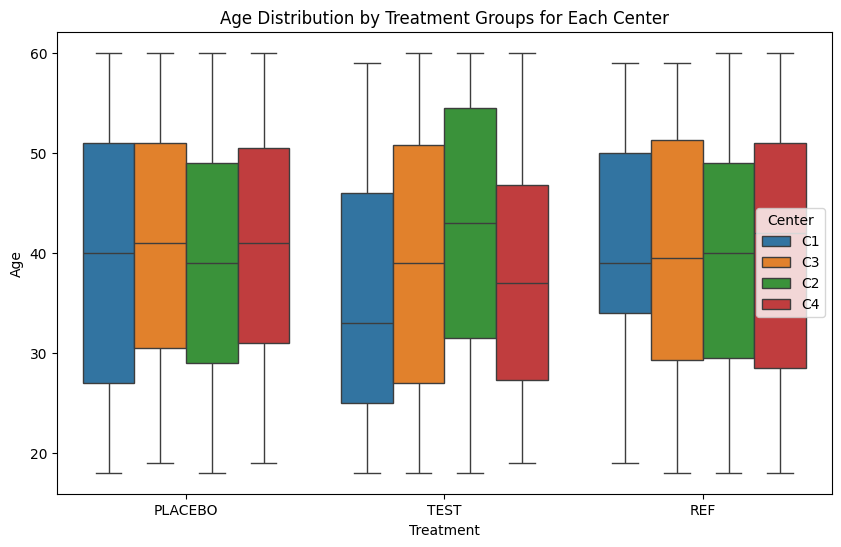

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Treatment', y='Age', hue='Center')
plt.title('Age Distribution by Treatment Groups for Each Center')
plt.xlabel('Treatment')
plt.ylabel('Age')
plt.legend(title='Center')
plt.show()

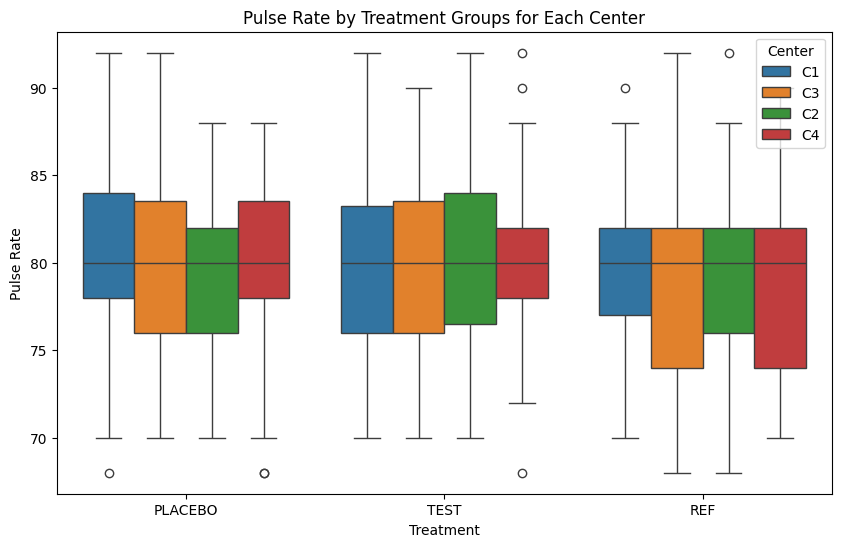

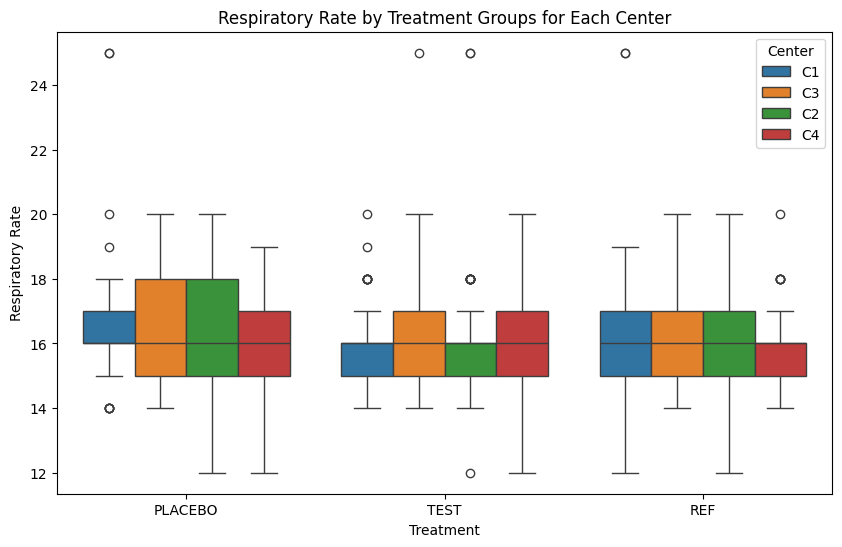

In [15]:
# Pulse Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Treatment', y='PR', hue='Center')
plt.title('Pulse Rate by Treatment Groups for Each Center')
plt.xlabel('Treatment')
plt.ylabel('Pulse Rate')
plt.legend(title='Center')
plt.show()

# Respiratory Rate
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='Treatment', y='RR', hue='Center')
plt.title('Respiratory Rate by Treatment Groups for Each Center')
plt.xlabel('Treatment')
plt.ylabel('Respiratory Rate')
plt.legend(title='Center')
plt.show()

Phase 2: Preliminary Analysis of VAS, AE, and Global Assessment

In [25]:
# Merge VAS data with randomization data
merged_vas_data = pd.merge(randomazedata, vasdata, on='Patient_ID', how='inner')

# Check merged data
merged_vas_data.head()
#vas_merged_data.info()

,Patient_ID,Treatment,Center,Day,VAS
0,PID/001,PLACEBO,C1,DAY1,72
1,PID/001,PLACEBO,C1,DAY2,70
2,PID/001,PLACEBO,C1,DAY3,69
3,PID/001,PLACEBO,C1,DAY4,56
4,PID/001,PLACEBO,C1,DAY5,56


In [26]:
summary_vas = merged_vas_data.groupby(['Treatment', 'Day']).agg({
    'VAS': ['count', 'mean', 'std', 'median', 'min', 'max']
}).reset_index()

# Flatten MultiIndex columns
summary_vas.columns = ['_'.join(col).strip() for col in summary_vas.columns.values]

print(summary_vas)

   Treatment_  Day_  VAS_count   VAS_mean    VAS_std  VAS_median  VAS_min  \
0     PLACEBO  DAY1        272  64.555147  14.558594        66.0       22   
1     PLACEBO  DAY2        272  57.363971  14.177703        58.0       18   
2     PLACEBO  DAY3        272  49.022059  16.324643        51.0        0   
3     PLACEBO  DAY4        272  41.106618  15.079116        45.0        0   
4     PLACEBO  DAY5        272  35.216912  15.206840        36.5        0   
5     PLACEBO  DAY6        272  31.356618  17.269986        29.0        0   
6     PLACEBO  DAY7        272  28.000000  18.209523        26.0        0   
7         REF  DAY1        261  63.406130  16.751458        72.0       16   
8         REF  DAY2        261  46.735632  19.881259        48.0        0   
9         REF  DAY3        261  29.593870  21.475474        29.0        0   
10        REF  DAY4        261  21.823755  17.683314        24.0        0   
11        REF  DAY5        261  17.567050  15.756083        19.0        0   

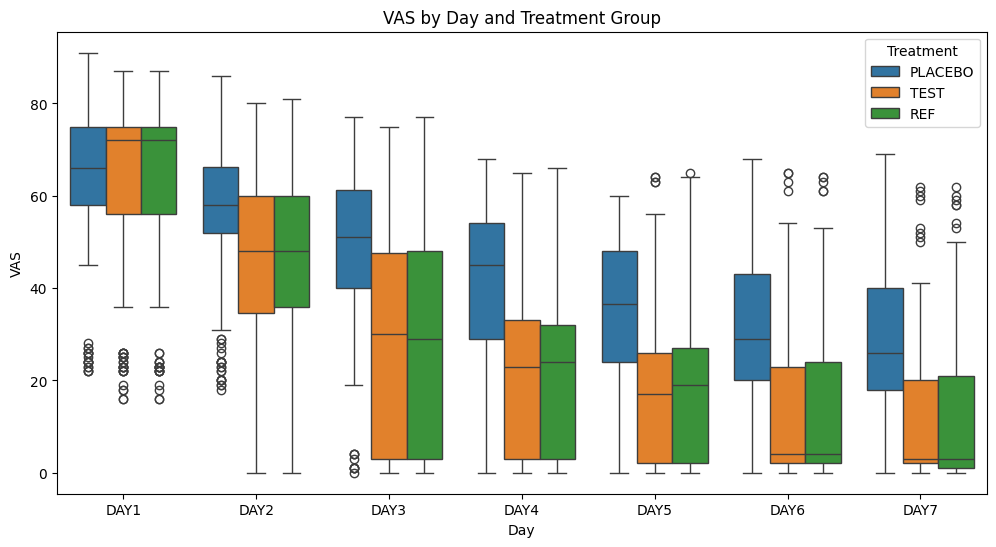

In [27]:
#Visualization VAS for Each Day by Treatment Groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=merged_vas_data, x='Day', y='VAS', hue='Treatment')
plt.title('VAS by Day and Treatment Group')
plt.xlabel('Day')
plt.ylabel('VAS')
plt.legend(title='Treatment')
plt.show()

In [29]:
#“Change from Baseline in VAS” and Summarize by Treatment
# Pivot VAS data
vas_pivot = merged_vas_data.pivot(index='Patient_ID', columns='Day', values='VAS').reset_index()

# Rename columns for clarity
vas_pivot.columns.name = None

# Ensure the columns have proper names (Day1, Day2, etc.)
vas_pivot.columns = ['Patient_ID', 'Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7']

# Calculate change from baseline (Day 1)
baseline_col = 'Day1'
for day in ['Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7']:
    vas_pivot[f'Change_{day}'] = vas_pivot[day] - vas_pivot[baseline_col]

# Melt the dataframe to long format for summary statistics
vas_melted = vas_pivot.melt(id_vars=['Patient_ID', baseline_col],
                            value_vars=[f'Change_{day}' for day in ['Day2', 'Day3', 'Day4', 'Day5', 'Day6', 'Day7']],
                            var_name='Day', value_name='VAS_Change')

# Merge with randomization data for treatment groups
vas_change_data = pd.merge(randomazedata, vas_melted, on='Patient_ID', how='inner')

# Extract day number from 'Day' column for grouping
vas_change_data['Day'] = vas_change_data['Day'].str.extract('(\d+)').astype(int)

# Summary statistics of change from baseline
summary_stat_change = vas_change_data.groupby(['Treatment', 'Day']).agg({
    'VAS_Change': ['count', 'mean', 'std', 'median', 'min', 'max']
}).reset_index()

# Flatten the MultiIndex columns
summary_stat_change.columns = ['_'.join(col).strip() for col in summary_stat_change.columns.values]

print(summary_stat_change)

   Treatment_  Day_  VAS_Change_count  VAS_Change_mean  VAS_Change_std  \
0     PLACEBO     2               272        -7.191176        5.566790   
1     PLACEBO     3               272       -15.533088        9.982587   
2     PLACEBO     4               272       -23.448529       12.128354   
3     PLACEBO     5               272       -29.338235       14.876972   
4     PLACEBO     6               272       -33.198529       18.098876   
5     PLACEBO     7               272       -36.555147       19.871838   
6         REF     2               261       -16.670498       16.378182   
7         REF     3               261       -33.812261       21.172896   
8         REF     4               261       -41.582375       20.572338   
9         REF     5               261       -45.839080       20.588201   
10        REF     6               261       -50.068966       21.255656   
11        REF     7               261       -52.295019       21.761848   
12       TEST     2               247 

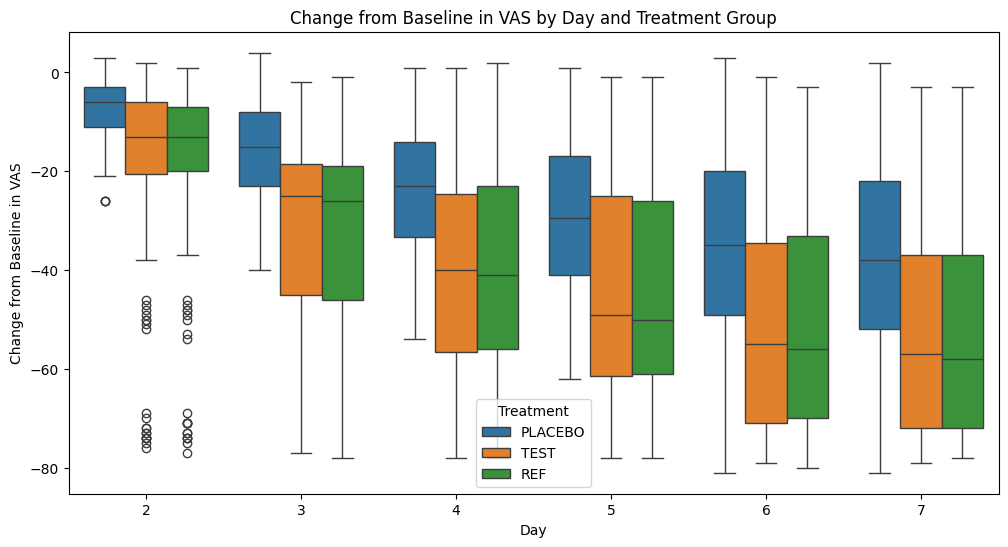

In [30]:
#Visualization “Change from Baseline in VAS” by Treatment Groups
plt.figure(figsize=(12, 6))
sns.boxplot(data=vas_change_data, x='Day', y='VAS_Change', hue='Treatment')
plt.title('Change from Baseline in VAS by Day and Treatment Group')
plt.xlabel('Day')
plt.ylabel('Change from Baseline in VAS')
plt.legend(title='Treatment')
plt.show()

In [31]:
# Merge with randomization data
merged_pga_data = pd.merge(randomazedata, globaldata, on='Patient_ID', how='inner')
merged_pga_data.head()

,Patient_ID,Treatment,Center,PGA
0,PID/001,PLACEBO,C1,2
1,PID/002,TEST,C3,4
2,PID/003,TEST,C2,4
3,PID/004,TEST,C1,4
4,PID/005,PLACEBO,C1,1


In [32]:
#Summary Variable PGA by Treatment Group
summary_pga = merged_pga_data.groupby('Treatment').agg({
    'PGA': ['count', 'median', 'min', 'max']
}).reset_index()

print(summary_pga)

  Treatment   PGA               
            count median min max
0   PLACEBO   272    1.0   0   4
1       REF   261    4.0   2   4
2      TEST   247    4.0   3   4


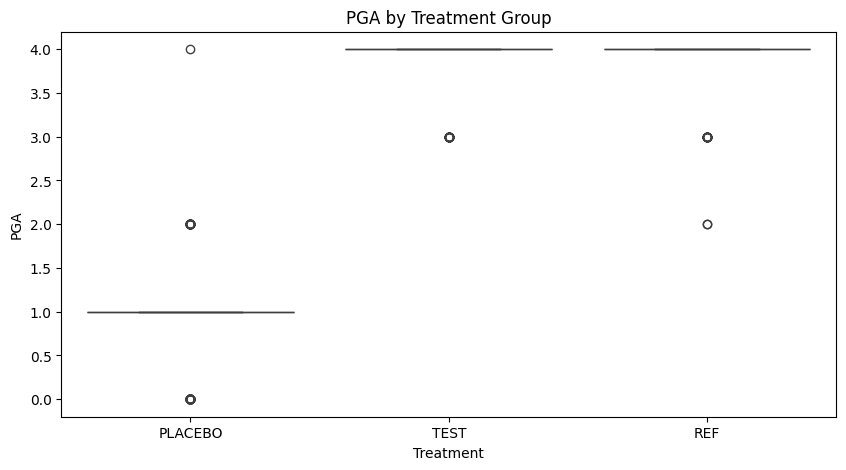

In [33]:
#Visualization Variable PGA by Treatment Group
plt.figure(figsize=(10, 5))
sns.boxplot(data=merged_pga_data, x='Treatment', y='PGA')
plt.title('PGA by Treatment Group')
plt.xlabel('Treatment')
plt.ylabel('PGA')
plt.show()

In [36]:
# Merge with randomization data
merged_ae_data = pd.merge(randomazedata, aedata, on='Patient_ID', how='inner')
merged_ae_data.head()
merged_ae_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Patient_ID   780 non-null    object
 1   Treatment    780 non-null    object
 2   Center       780 non-null    object
 3   AE           780 non-null    object
 4   AE_REL       68 non-null     object
 5   AE_SEVERITY  68 non-null     object
dtypes: object(6)
memory usage: 36.7+ KB


In [37]:
#Summary Adverse Events and Relation by Treatment Group
summary_ae = merged_ae_data.groupby(['Treatment', 'AE']).agg({
    'AE': 'count'
}).rename(columns={'AE': 'count'}).reset_index()

summary_ae_relation = merged_ae_data.groupby(['Treatment', 'AE_REL']).agg({
    'AE_REL': 'count'
}).rename(columns={'AE_REL': 'count'}).reset_index()

print(summary_ae)
print(summary_ae_relation)

   Treatment         AE  count
0    PLACEBO    Acidity     17
1    PLACEBO  Gastritis      1
2    PLACEBO       NONE    248
3    PLACEBO   headache      6
4        REF    Acidity     11
5        REF  Gastritis      3
6        REF       NONE    239
7        REF    acidity      2
8        REF   headache      6
9       TEST    Acidity      8
10      TEST  Gastritis      9
11      TEST   Headache      2
12      TEST       NONE    225
13      TEST   headache      3
  Treatment       AE_REL  count
0   PLACEBO  NOT RELATED     24
1       REF  NOT RELATED     22
2      TEST  NOT RELATED     22


In [38]:
# Assuming the randomization data includes a 'Center' column
summary_center_trend = vas_change_data.groupby(['Center', 'Day']).agg({
    'VAS_Change': ['count', 'mean', 'std', 'median', 'min', 'max']
}).reset_index()

# Flatten the MultiIndex columns
summary_center_trend.columns = ['_'.join(col).strip() for col in summary_center_trend.columns.values]

print(summary_center_trend)

   Center_  Day_  VAS_Change_count  VAS_Change_mean  VAS_Change_std  \
0       C1     2               190       -12.673684       14.064434   
1       C1     3               190       -26.010526       18.306615   
2       C1     4               190       -34.721053       18.614754   
3       C1     5               190       -39.810526       19.157545   
4       C1     6               190       -44.342105       20.644992   
5       C1     7               190       -47.257895       21.723657   
6       C2     2               191       -13.439791       14.954854   
7       C2     3               191       -27.785340       20.901297   
8       C2     4               191       -36.612565       21.023462   
9       C2     5               191       -41.204188       21.872241   
10      C2     6               191       -44.984293       23.900336   
11      C2     7               191       -47.293194       24.603549   
12      C3     2               199       -13.477387       13.541490   
13    

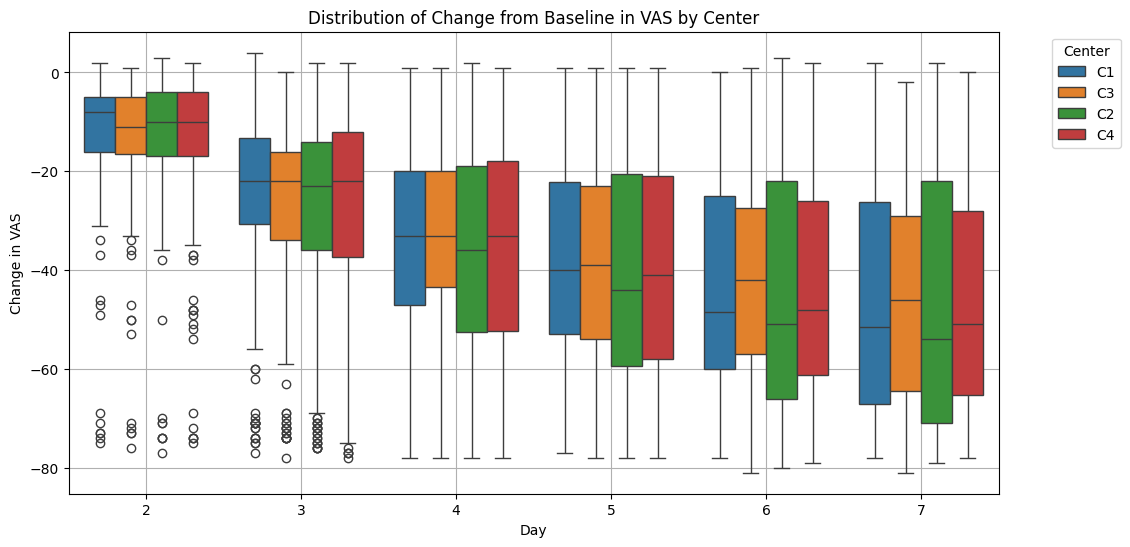

In [44]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=vas_change_data, x='Day', y='VAS_Change', hue='Center')

plt.title('Distribution of Change from Baseline in VAS by Center')
plt.xlabel('Day')
plt.ylabel('Change in VAS')
plt.legend(title='Center', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()